In [ ]:
!pip install jqdatasdk

In [ ]:
!pip install pyts

In [ ]:
from jqdatasdk import *
# phone number / password for joinquant
auth('','')

In [3]:
import pandas as pd
import numpy as np
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt
import time
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras import layers, models

In [78]:
# data test
security = '300999.XSHE'
df_daily = get_price(security, start_date='2018-01-01', end_date='2019-12-31', frequency='daily')
df_hour = get_price(security, start_date='2018-01-01', end_date='2019-12-31', frequency='60m')

In [ ]:
df_hour

In [ ]:
df_daily

In [76]:
def get_train_data(security):
  #security = '000002.XSHE'
  # get data
  df_daily = get_price(security, start_date='2018-01-01', end_date='2019-12-31', frequency='daily')
  df_daily.head()
  df_hour = get_price(security, start_date='2018-01-01', end_date='2019-12-31', frequency='60m')
  df_hour.head()
  trading_hour = list(df_hour.index)
  trading_day = list(df_daily.index)

  # save necessary data
  data = []
  for index in range(30, len(trading_day)-2):
    tmp = {}
    tmp['time'] = trading_day[index].date()
    end_index = trading_day.index(trading_day[index]) + 1
    start_index = end_index - 10
    tmp['day_close'] = list(df_daily[start_index:end_index]['close'])
    tmp['day_high'] = list(df_daily[start_index:end_index]['high'])
    tmp['day_open'] = list(df_daily[start_index:end_index]['open'])
    tmp['day_low'] = list(df_daily[start_index:end_index]['low'])
    tmp['day_volume'] = list(df_daily[start_index:end_index]['volume'])
    tmp['reward'] = float(df_daily[end_index:end_index+1]['open']) - float(df_daily[end_index-1:end_index]['open'])
    end_index = trading_hour.index(trading_day[index+1].date())
    start_index = end_index - 10
    tmp['hour_close'] = list(df_hour[start_index:end_index]['close'])
    tmp['hour_high'] = list(df_hour[start_index:end_index]['high'])
    tmp['hour_open'] = list(df_hour[start_index:end_index]['open'])
    tmp['hour_low'] = list(df_hour[start_index:end_index]['low'])
    tmp['hour_volume'] = list(df_hour[start_index:end_index]['volume'])
    data.append(tmp)

  # transfer list data into image data
  image_data = []
  for index in range(len(data)):
    sample_input = data[index]
    transformer = GramianAngularField()
    sample_day_close = np.array(sample_input['day_close']).reshape(1,10)
    sample_day_high = np.array(sample_input['day_high']).reshape(1,10)
    sample_day_open = np.array(sample_input['day_open']).reshape(1,10)
    sample_day_low = np.array(sample_input['day_low']).reshape(1,10)
    sample_day_volume = np.array(sample_input['day_volume']).reshape(1,10)
    sample_hour_close = np.array(sample_input['hour_close']).reshape(1,10)
    sample_hour_high = np.array(sample_input['hour_high']).reshape(1,10)
    sample_hour_open = np.array(sample_input['hour_open']).reshape(1,10)
    sample_hour_low = np.array(sample_input['hour_low']).reshape(1,10)
    sample_hour_volume = np.array(sample_input['hour_volume']).reshape(1,10)
    new_sample_day_close = transformer.transform(sample_day_close)
    new_sample_day_high = transformer.transform(sample_day_high)
    new_sample_day_open = transformer.transform(sample_day_open)
    new_sample_day_low = transformer.transform(sample_day_low)
    new_sample_day_volume = transformer.transform(sample_day_volume)
    new_sample_hour_close = transformer.transform(sample_hour_close)
    new_sample_hour_high = transformer.transform(sample_hour_high)
    new_sample_hour_open = transformer.transform(sample_hour_open)
    new_sample_hour_low = transformer.transform(sample_hour_low)
    new_sample_hour_volume = transformer.transform(sample_hour_volume)
    sample_image = np.zeros((30,30))
    for i in range(0,10):
      for j in range(0,10):
        sample_image[i][j] = new_sample_day_close[0][i][j]
    for i in range(0,10):
      for j in range(10,20):
        sample_image[i][j] = new_sample_day_high[0][i][j-10]
    for i in range(0,10):
      for j in range(20,30):
        sample_image[i][j] = new_sample_day_open[0][i][j-20]
    for i in range(10,20):
      for j in range(0,10):
        sample_image[i][j] = new_sample_hour_close[0][i-10][j]
    for i in range(10,20):
      for j in range(10,20):
        sample_image[i][j] = new_sample_hour_high[0][i-10][j-10]
    for i in range(10,20):
      for j in range(20,30):
        sample_image[i][j] = new_sample_hour_open[0][i-10][j-20]
    for i in range(20,30):
      for j in range(0,10):
        sample_image[i][j] = new_sample_day_low[0][i-20][j]
    for i in range(20,30):
      for j in range(10,20):
        sample_image[i][j] = new_sample_hour_low[0][i-20][j-10]
    for i in range(20,30):
      for j in range(20,30):
        sample_image[i][j] = new_sample_day_volume[0][i-20][j-20]
    show_img = sample_image
    sample_image = sample_image.reshape((30,30,1))
    image_data.append(sample_image)
  return data, image_data


In [ ]:

index = 30
print('Sample date: ' + str(trading_day[index].date()))
tmp = {}
tmp['time'] = trading_day[index].date()
end_index = trading_day.index(trading_day[index]) + 1
start_index = end_index - 10
print('---')
print(df_daily[start_index:end_index])
tmp['day_close'] = list(df_daily[start_index:end_index]['close'])
tmp['day_high'] = list(df_daily[start_index:end_index]['high'])
tmp['day_open'] = list(df_daily[start_index:end_index]['open'])
tmp['day_low'] = list(df_daily[start_index:end_index]['low'])
tmp['day_volume'] = list(df_daily[start_index:end_index]['volume'])
print('---')
print(df_daily[end_index:end_index+1])
print(df_daily[end_index-1:end_index])
tmp['reward'] = float(df_daily[end_index:end_index+1]['open']) - float(df_daily[end_index-1:end_index]['open'])
end_index = trading_hour.index(trading_day[index+1].date())
start_index = end_index - 10
print('---')
print(df_hour[start_index:end_index])
tmp['hour_close'] = list(df_hour[start_index:end_index]['close'])
tmp['hour_high'] = list(df_hour[start_index:end_index]['high'])
tmp['hour_open'] = list(df_hour[start_index:end_index]['open'])
tmp['hour_low'] = list(df_hour[start_index:end_index]['low'])
tmp['hour_volume'] = list(df_hour[start_index:end_index]['volume'])
print('---')
print('Data for sample date: ')
tmp


Sample date: 2012-02-22
---
            open  close  high   low       volume         money
2012-02-09  5.60   5.67  5.75  5.54  171333382.0  9.745684e+08
2012-02-10  5.68   5.78  5.91  5.68  243024532.0  1.417375e+09
2012-02-13  5.57   5.67  5.74  5.47  123891872.0  6.961397e+08
2012-02-14  5.63   5.67  5.68  5.55  119018480.0  6.664822e+08
2012-02-15  5.63   5.76  5.76  5.60   73584525.0  4.200416e+08
2012-02-16  5.73   5.74  5.76  5.65   54309575.0  3.100046e+08
2012-02-17  5.78   5.74  5.79  5.68   60599109.0  3.468961e+08
2012-02-20  5.83   5.76  5.90  5.74   97605371.0  5.695468e+08
2012-02-21  5.77   5.83  5.84  5.73   51555750.0  2.979491e+08
2012-02-22  5.88   6.03  6.04  5.88  164719760.0  9.854669e+08
---
            open  close  high  low       volume        money
2012-02-23  6.04   6.03  6.11  6.0  103225191.0  623803904.0
            open  close  high   low       volume        money
2012-02-22  5.88   6.03  6.04  5.88  164719760.0  985466880.0
---
                     open

{'day_close': [5.67, 5.78, 5.67, 5.67, 5.76, 5.74, 5.74, 5.76, 5.83, 6.03],
 'day_high': [5.75, 5.91, 5.74, 5.68, 5.76, 5.76, 5.79, 5.9, 5.84, 6.04],
 'day_low': [5.54, 5.68, 5.47, 5.55, 5.6, 5.65, 5.68, 5.74, 5.73, 5.88],
 'day_open': [5.6, 5.68, 5.57, 5.63, 5.63, 5.73, 5.78, 5.83, 5.77, 5.88],
 'day_volume': [171333382.0,
  243024532.0,
  123891872.0,
  119018480.0,
  73584525.0,
  54309575.0,
  60599109.0,
  97605371.0,
  51555750.0,
  164719760.0],
 'hour_close': [5.8, 5.76, 5.78, 5.77, 5.77, 5.83, 5.96, 5.96, 5.98, 6.03],
 'hour_high': [5.85, 5.81, 5.8, 5.79, 5.81, 5.83, 6.04, 5.98, 5.99, 6.04],
 'hour_low': [5.75, 5.74, 5.76, 5.73, 5.74, 5.76, 5.88, 5.93, 5.95, 5.99],
 'hour_open': [5.81, 5.79, 5.77, 5.78, 5.76, 5.76, 5.88, 5.96, 5.96, 5.99],
 'hour_volume': [13386751.0,
  10398471.0,
  6267769.0,
  12035566.0,
  10889883.0,
  22362455.0,
  77911657.0,
  23142228.0,
  18332536.0,
  45333272.0],
 'reward': 0.16000000000000014,
 'time': datetime.date(2012, 2, 22)}

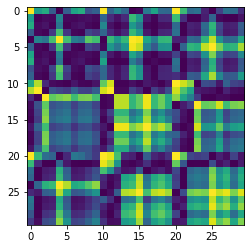

In [ ]:
#show_img = image_data[2].reshape((20,20))
plt.imshow(show_img)

In [ ]:
# transfer to image test
#close = close.reshape(1,296)
#transformer = GramianAngularField()
#X_new = transformer.transform(close)

In [81]:
class DqnAgent:
    def __init__(self):
        self.q_net = self._build_dqn_model()
        self.target_q_net = self._build_dqn_model()
    
    @staticmethod
    def _build_dqn_model():
        q_net = models.Sequential()
        q_net.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 9)))
        q_net.add(layers.MaxPooling2D((2, 2)))
        q_net.add(layers.Conv2D(64, (3, 3), activation='relu'))
        #q_net.add(layers.MaxPooling2D((2, 2)))
        q_net.add(layers.Conv2D(64, (3, 3), activation='relu'))
        q_net.add(layers.Flatten())
        q_net.add(layers.Dense(64, activation='relu'))
        q_net.add(layers.Dense(len(all_actions)))
        q_net.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                      loss='mse')
        #q_net.summary()
        return q_net

    def random_policy(self, state):
        return np.random.randint(0, len(all_actions))

    def collect_policy(self, state):
        if np.random.random() < 0.05:
            return self.random_policy(state)
        return self.policy(state)

    def policy(self, state):
        state_input = tf.convert_to_tensor([state], dtype=tf.float32)
        action_q = self.q_net(state_input)
        action = np.argmax(action_q.numpy()[0], axis=0)
        return action

    def update_target_network(self):
        self.target_q_net.set_weights(self.q_net.get_weights())

    def train(self, batch):
        state_batch, next_state_batch, action_batch, reward_batch, done_batch = batch
        state_batch = tf.convert_to_tensor(state_batch, dtype=tf.float32)
        current_q = self.q_net(state_batch).numpy()
        target_q = np.copy(current_q)
        next_state_batch = tf.convert_to_tensor(next_state_batch, dtype=tf.float32)
        next_q = self.target_q_net(next_state_batch).numpy()
        max_next_q = np.amax(next_q, axis=1)
        for i in range(state_batch.shape[0]):
            target_q_val = reward_batch[i]
            if not done_batch[i]:
                target_q_val += 0.95 * max_next_q[i]
            target_q[i][action_batch[i]] = target_q_val
        training_history = self.q_net.fit(x=state_batch, y=target_q, verbose=0)
        loss = training_history.history['loss']
        return loss

In [82]:
def generate_action(n=9, delta=0.1):
  # n : number of stocks
  # delta : resolution
  ans = []
  tmp = []
  def get_next(tmp, left):
    if len(tmp) == n:
      ans.append(tmp)
      return
    
    for i in range(left+1):
      get_next(tmp+[i], left-i)
  get_next(tmp, n)
  return ans

In [83]:
all_actions = generate_action()
print(len(all_actions))

48620


In [88]:
# simulate environment
class Env:
  def __init__(self, data, image_data):
    self.data = data
    self.image_data = image_data
    self.index = 0
    self.length = len(data) - 1
    self.done = False

  def current_state(self):
    return [self.index, self.data[self.index], self.image_data[self.index]]

  def step(self, action):
    if self.done:
      return 0, True
    
    self.index += 1
    reward = 0
    actions = all_actions
    # change reward here
    for i in range(9):
      tmp = actions[action][i]
      tmp = tmp / self.data[self.index][i]['day_open'][-1]
      tmp = tmp * self.data[self.index][i]['reward']
      reward += tmp
    #
    if self.index == self.length - 1:
      self.done = True
    return self.image_data[self.index], reward, self.done

  def reset(self):
    self.index = 0
    self.done = False
    return self.image_data[self.index]
    # return state
  
  

In [89]:
class ReplayBuffer:
  def __init__(self):
    self.experiences = deque()
    self.max_length = 1000000

  def store(self, state, next_state, reward, action, done):
    if len(self.experiences) >= self.max_length:
      self.experiences.popleft()
    self.experiences.append((state, next_state, reward, action, done))

  def sample(self):
    batch_size = min(128, len(self.experiences))
    sampled_batch = random.sample(self.experiences, batch_size)
    state_batch, next_state_batch, action_batch, reward_batch, done_batch = [], [], [], [], []
    for gameplay_experience in sampled_batch:
      state_batch.append(gameplay_experience[0])
      next_state_batch.append(gameplay_experience[1])
      reward_batch.append(gameplay_experience[2])
      action_batch.append(gameplay_experience[3])
      done_batch.append(gameplay_experience[4])
    return state_batch, next_state_batch, action_batch, reward_batch, done_batch


In [94]:
def evaluate_training_result(env, agent, buffer):
    total_reward = 0.0
    episodes_to_play = 1
    for i in range(episodes_to_play):
        state = env.reset()
        done = False
        episode_reward = 0.0
        while not done:
            action = agent.policy(state)
            next_state, reward, done = env.step(action)
            buffer.store(state, next_state, reward, action, done)
            episode_reward += reward
            state = next_state
        total_reward += episode_reward
    average_reward = total_reward / episodes_to_play
    return average_reward


def collect_experiences(env, agent, buffer):
    state = env.reset()
    done = False
    while not done:
        action = agent.collect_policy(state)
        next_state, reward, done = env.step(action)
        buffer.store(state, next_state, reward, action, done)
        state = next_state

# change max_episodes here
def train_model(max_episodes=6000):
    agent = DqnAgent()
    buffer = ReplayBuffer()
    env = Env(data, image_data)
    for _ in range(1):
        collect_experiences(env, agent, buffer)
    for episode_cnt in range(max_episodes):
        #collect_experiences(env, agent, buffer)
        gameplay_experience_batch = buffer.sample()
        loss = agent.train(gameplay_experience_batch)
        avg_reward = evaluate_training_result(env, agent, buffer)
        print('Episode {0}/{1} and so far the performance is {2} and '
              'loss is {3}'.format(episode_cnt, max_episodes,
                                   avg_reward, loss[0]))
        if episode_cnt % 20 == 0:
            agent.update_target_network()
    print('No bug lol!!!')
    return agent




In [ ]:
# get train data
security_list = ['600519.XSHG', '601318.XSHG', '000858.XSHG', '600036.XSHG', '600276.XSHG', '000333.XSHE', '000651.XSHE', '600030.XSHG', '002475.XSHE']
tmp_data_list = []
tmp_image_data_list = []
for security in security_list:
  print(security)
  data, image_data = get_train_data(security)
  tmp_data_list.append(data)
  tmp_image_data_list.append(image_data)


In [92]:
# modify train data
length = len(tmp_data_list[0])
data = []
image_data = []
for i in range(length):
  tmp_data = []
  for j in range(len(tmp_data_list)):
    tmp_data.append(tmp_data_list[j][i])
  data.append(tmp_data)

  tmp_image_data = [[[] for _ in range(30)] for _ in range(30) ]
  for x in range(30):
    for y in range(30):
      for j in range(9):
        tmp_image_data[x][y].append(tmp_image_data_list[j][i][x][y][0])
  
  image_data.append(tmp_image_data)

In [ ]:
# train model
agent = train_model()

In [98]:
### Test
def get_test_data(security):
  st = 42 # starting day index
  test_df_daily = get_price(security, start_date='2019-12-01', end_date='2020-12-31', frequency='daily')
  test_df_hour = get_price(security, start_date='2019-12-01', end_date='2020-12-31', frequency='60m')

  test_trading_hour = list(test_df_hour.index)
  test_trading_day = list(test_df_daily.index)

  test_data = []
  for index in range(st, len(test_trading_day)-2):
    tmp = {}
    tmp['time'] = test_trading_day[index].date()
    end_index = test_trading_day.index(test_trading_day[index]) + 1
    start_index = end_index - 10
    tmp['day_close'] = list(test_df_daily[start_index:end_index]['close'])
    tmp['day_high'] = list(test_df_daily[start_index:end_index]['high'])
    tmp['day_open'] = list(test_df_daily[start_index:end_index]['open'])
    tmp['day_low'] = list(test_df_daily[start_index:end_index]['low'])
    tmp['day_volume'] = list(test_df_daily[start_index:end_index]['volume'])
    tmp['reward'] = float(test_df_daily[end_index:end_index+1]['open']) - float(test_df_daily[end_index-1:end_index]['open'])
    end_index = test_trading_hour.index(test_trading_day[index+1].date())
    start_index = end_index - 10
    tmp['hour_close'] = list(test_df_hour[start_index:end_index]['close'])
    tmp['hour_high'] = list(test_df_hour[start_index:end_index]['high'])
    tmp['hour_open'] = list(test_df_hour[start_index:end_index]['open'])
    tmp['hour_low'] = list(test_df_hour[start_index:end_index]['low'])
    tmp['hour_volume'] = list(test_df_hour[start_index:end_index]['volume'])
    test_data.append(tmp)

  test_image_data = []
  for index in range(len(test_data)):
    sample_input = test_data[index]
    transformer = GramianAngularField()
    sample_day_close = np.array(sample_input['day_close']).reshape(1,10)
    sample_day_high = np.array(sample_input['day_high']).reshape(1,10)
    sample_day_open = np.array(sample_input['day_open']).reshape(1,10)
    sample_day_low = np.array(sample_input['day_low']).reshape(1,10)
    sample_day_volume = np.array(sample_input['day_volume']).reshape(1,10)
    sample_hour_close = np.array(sample_input['hour_close']).reshape(1,10)
    sample_hour_high = np.array(sample_input['hour_high']).reshape(1,10)
    sample_hour_open = np.array(sample_input['hour_open']).reshape(1,10)
    sample_hour_low = np.array(sample_input['hour_low']).reshape(1,10)
    sample_hour_volume = np.array(sample_input['hour_volume']).reshape(1,10)
    new_sample_day_close = transformer.transform(sample_day_close)
    new_sample_day_high = transformer.transform(sample_day_high)
    new_sample_day_open = transformer.transform(sample_day_open)
    new_sample_day_low = transformer.transform(sample_day_low)
    new_sample_day_volume = transformer.transform(sample_day_volume)
    new_sample_hour_close = transformer.transform(sample_hour_close)
    new_sample_hour_high = transformer.transform(sample_hour_high)
    new_sample_hour_open = transformer.transform(sample_hour_open)
    new_sample_hour_low = transformer.transform(sample_hour_low)
    new_sample_hour_volume = transformer.transform(sample_hour_volume)
    sample_image = np.zeros((30,30))
    for i in range(0,10):
      for j in range(0,10):
        sample_image[i][j] = new_sample_day_close[0][i][j]
    for i in range(0,10):
      for j in range(10,20):
        sample_image[i][j] = new_sample_day_high[0][i][j-10]
    for i in range(0,10):
      for j in range(20,30):
        sample_image[i][j] = new_sample_day_open[0][i][j-20]
    for i in range(10,20):
      for j in range(0,10):
        sample_image[i][j] = new_sample_hour_close[0][i-10][j]
    for i in range(10,20):
      for j in range(10,20):
        sample_image[i][j] = new_sample_hour_high[0][i-10][j-10]
    for i in range(10,20):
      for j in range(20,30):
        sample_image[i][j] = new_sample_hour_open[0][i-10][j-20]
    for i in range(20,30):
      for j in range(0,10):
        sample_image[i][j] = new_sample_day_low[0][i-20][j]
    for i in range(20,30):
      for j in range(10,20):
        sample_image[i][j] = new_sample_hour_low[0][i-20][j-10]
    for i in range(20,30):
      for j in range(20,30):
        sample_image[i][j] = new_sample_day_volume[0][i-20][j-20]
    show_img = sample_image
    sample_image = sample_image.reshape((30,30,1))
    test_image_data.append(sample_image)
  return test_data, test_image_data, test_df_daily


In [99]:
# get test data
tmp_data_list = []
tmp_image_data_list = []
open_price = []
st=42
for security in security_list:
  data, image_data, df_daily = get_test_data(security)
  open_price.append(df_daily[st:]['open'])
  tmp_data_list.append(data)
  tmp_image_data_list.append(image_data)

length = len(tmp_data_list[0])
data = []
image_data = []
for i in range(length):
  tmp_data = []
  for j in range(len(tmp_data_list)):
    tmp_data.append(tmp_data_list[j][i])
  data.append(tmp_data)

  tmp_image_data = [[[] for _ in range(30)] for _ in range(30) ]
  for x in range(30):
    for y in range(30):
      for j in range(9):
        tmp_image_data[x][y].append(tmp_image_data_list[j][i][x][y][0])
  
  image_data.append(tmp_image_data)

In [101]:
# get all actions
actions = generate_action()

In [102]:
# generate test action
test_action = []
for i in range(len(image_data)-1):
  state1 = image_data[i]
  a = agent.collect_policy(state1)
  test_action.append(actions[a])

In [ ]:
# test_action

In [139]:
# test according to fund
# bah_weight = [17, 17, 9, 8, 7, 7, 5, 5, 5]
# bah_money = []
# for i in bah_weight:
#   bah_money.append(900000*i/sum(bah_weight))
# print(bah_money)

[191250.0, 191250.0, 101250.0, 90000.0, 78750.0, 78750.0, 56250.0, 56250.0, 56250.0]


In [151]:
before = []
after = []
bah_money = [100000 for _ in range(9)]
bah_shares = [0 for _ in range(9)]
long_money = [100000 for _ in range(9)]
long_shares = [0 for _ in range(9)]
extra_money = 0
#total_long_money = 400000
for i in range(len(test_action)):
  for j in range(9):
    if long_shares[j] != 0:
      long_money[j] = long_shares[j] * open_price[j][i+1]
      long_shares[j] = 0
    if bah_shares[j] != 0:
      bah_money[j] = bah_shares[j] * open_price[j][i+1]
      bah_shares[j] = 0
  before.append(sum(bah_money))
  after.append(sum(long_money)+extra_money)
  # print(long_money)
  # print(test_action[i])
  total_long_money = sum(long_money) + extra_money
  for j in range(9):
    if i > 0:
      loss_pct = (open_price[j][i] - open_price[j][i-1]) / open_price[j][i-1]
      if loss_pct < -0.03:
        long_shares[j] = 0
        # print('stop loss')
        # print(loss_pct)
        # print(i,j)
        # print(test_action[i][j])
      else:
        long_shares[j] = total_long_money * test_action[i][j] / 9 / open_price[j][i+1]
    else:
      long_shares[j] = total_long_money * test_action[i][j] / 9 / open_price[j][i+1]
    long_money[j] = long_shares[j] * open_price[j][i+1]
    bah_shares[j] = bah_money[j]/open_price[j][i+1]
  extra_money = after[-1] - sum(long_money)
  # print(extra_money)


In [152]:
base = 900000
for i in range(len(before)):
  before[i] = (before[i] - base) / base
  after[i] = (after[i] - base) / base

In [150]:
after_without_stoploss = after.copy()

In [136]:
bah = before.copy()

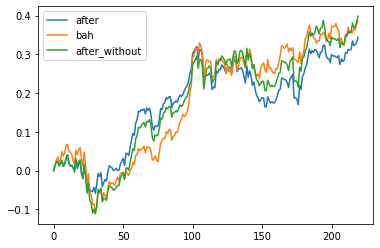

In [154]:
plt.plot(after,label='after')
plt.plot(bah,label='bah')
#plt.plot(before,label="fund")
plt.plot(after_without_stoploss,label="after_without")
plt.legend()